5.0
20.0


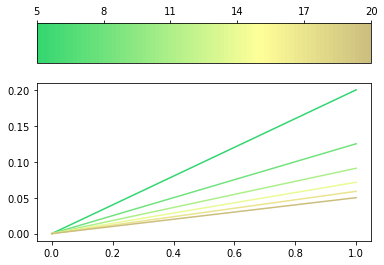

In [37]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors

gs = gridspec.GridSpec(2, 1,
                       height_ratios=[1, 4]
                       )
ax = [plt.subplot(g) for g in gs]

parameterToColorBy = np.linspace(5, 20, 6, dtype=float)

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=-1):
    if n == -1:
        n = cmap.N
    new_cmap = mcolors.LinearSegmentedColormap.from_list(
         'trunc({name},{a:.2f},{b:.2f})'.format(name=cmap.name, a=minval, b=maxval),
         cmap(np.linspace(minval, maxval, n)))
    return new_cmap

minColor = 0.3
maxColor = 0.6
inferno_t = truncate_colormap(plt.get_cmap("terrain"), minColor, maxColor)

colors = [inferno_t(i)
          for i in np.linspace(0, 1, parameterToColorBy.shape[0])]

norm = mpl.colors.Normalize(parameterToColorBy[0],
                            parameterToColorBy[-1])

print(parameterToColorBy[0])
print(parameterToColorBy[-1])
cb = mpl.colorbar.ColorbarBase(ax[0],
                               cmap=inferno_t,
                               norm=norm,
                               ticks=parameterToColorBy,
                               orientation='horizontal')

ax[0].xaxis.set_ticks_position('top')

for p, c in zip(parameterToColorBy, colors):
    ax[1].plot(np.arange(2)/p, c=c)

plt.show()